In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
%matplotlib inline

In [2]:
Titanic = pd.read_csv("Titanic.csv")

In [3]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#删掉一些没什么用的X值
Titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

# 描述性统计

In [6]:
#生存死亡人数描述性统计
total_survived = Titanic['Survived'].sum()
total_unsurvived = 891-Titanic['Survived'].sum()
print("生存人数为:",total_survived)
print("未生存人数为:",total_unsurvived)

生存人数为: 342
未生存人数为: 549


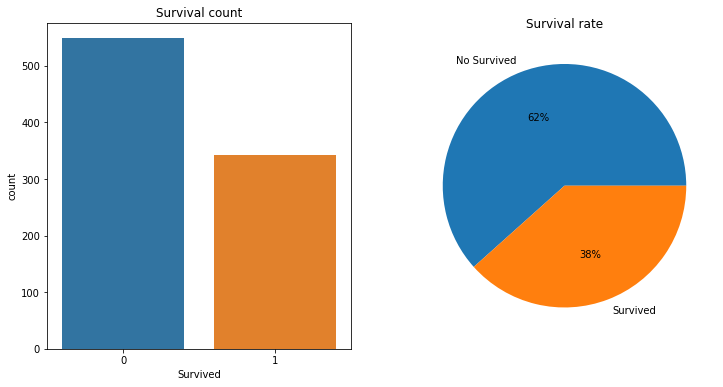

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='Survived', data=Titanic)
plt.title('Survival count')
plt.subplot(122)
plt.pie([total_unsurvived,total_survived],labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survival rate') 

plt.show()

In [8]:
#男女比例
total_male = Titanic['Sex'][Titanic['Sex'] == 'male'].count()
total_female = Titanic['Sex'][Titanic['Sex'] == 'female'].count()
print(f"船上男性一共{total_male}人，女性一共{total_female}人。")
print(f"男性占比{round((total_male/891)*100,2)}%,女性占比{round((total_female/891)*100,2)}%。")

船上男性一共577人，女性一共314人。
男性占比64.76%,女性占比35.24%。


In [9]:
#得到一个只有存活的人的dataframe
Survived = Titanic[Titanic[ 'Survived'] == 1 ]

In [10]:
#存活的男女数量及男女比例？
total_male_survived = Survived['Sex'][Survived['Sex'] == 'male'].count()
total_female_survived = Survived['Sex'][Survived['Sex'] == 'female'].count()
print(f"船上存活男性一共{total_male_survived}人，女性一共{total_female_survived}人。")
print(f"男性占比{round((total_male_survived/342)*100,2)}%,女性占比{round((total_female_survived/342)*100,2)}%。")

船上存活男性一共109人，女性一共233人。
男性占比31.87%,女性占比68.13%。


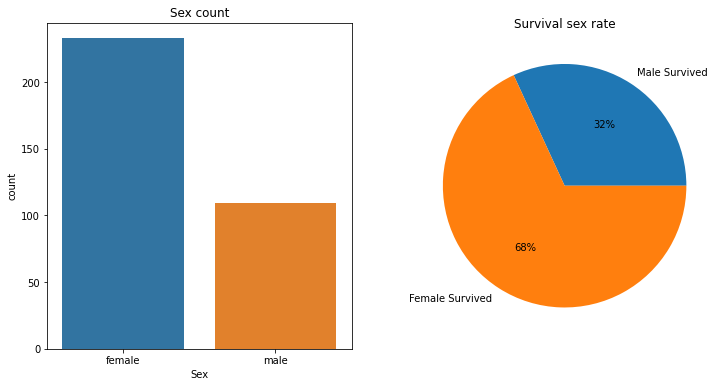

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='Sex', data=Survived)
plt.title('Sex count')
plt.subplot(122)
plt.pie([total_male_survived,total_female_survived],labels=['Male Survived','Female Survived'],autopct='%1.0f%%')
plt.title('Survival sex rate') 

plt.show()

In [12]:
#不同级别客舱的人数和比例
Pclass_1 = Titanic['Pclass'][Titanic['Pclass'] == 1].count()
Pclass_2 = Titanic['Pclass'][Titanic['Pclass'] == 2].count()
Pclass_3 = Titanic['Pclass'][Titanic['Pclass'] == 3].count()
print(f"一等舱一共{Pclass_1}人，二等舱一共{Pclass_2}人，三等舱一共{Pclass_3}人。")

一等舱一共216人，二等舱一共184人，三等舱一共491人。


In [13]:
#不同级别客舱生还人数和占总生还人数的比例
Pclass_1_survived = Survived['Pclass'][Survived['Pclass'] == 1].count()
Pclass_2_survived = Survived['Pclass'][Survived['Pclass'] == 2].count()
Pclass_3_survived = Survived['Pclass'][Survived['Pclass'] == 3].count()
print(f"一等舱一共生存{Pclass_1_survived}人，二等舱一共生存{Pclass_2_survived}人，三等舱一共生存{Pclass_3_survived}人。")
print(f"一等舱生存比例为{round((Pclass_1_survived/Pclass_1)*100,2)}%\n二等舱生存比例为{round((Pclass_2_survived/Pclass_2)*100,2)}%\n三等舱生存比例为{round((Pclass_3_survived/Pclass_3)*100,2)}%")

一等舱一共生存136人，二等舱一共生存87人，三等舱一共生存119人。
一等舱生存比例为62.96%
二等舱生存比例为47.28%
三等舱生存比例为24.24%


In [14]:
#年龄分布
Titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Age和Embarked存在缺失值，且Age缺失值较多，因此考虑填充

In [15]:
# 求年龄的平均值，标准差以及丢失值的数量
Avg_age_titanic = Titanic["Age"].mean()
Std_age_titanic = Titanic["Age"].std()


# 求年龄随机数，范围在 (mean - std， mean + std)
rand_1 = np.random.randint(Avg_age_titanic - Std_age_titanic, Avg_age_titanic + Std_age_titanic, size = 177)

# 将随机数填充进 Age 的丢失值中
Titanic["Age"][np.isnan(Titanic["Age"])] = rand_1

C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_24968\1293897426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic["Age"][np.isnan(Titanic["Age"])] = rand_1


In [16]:
Titanic.fillna(value = {'Embarked':Titanic.Embarked.mode()[0]}, inplace=True)

In [18]:
Titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
Titanic['Age'].describe()

count    891.000000
mean      29.419944
std       13.479801
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
Survived['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

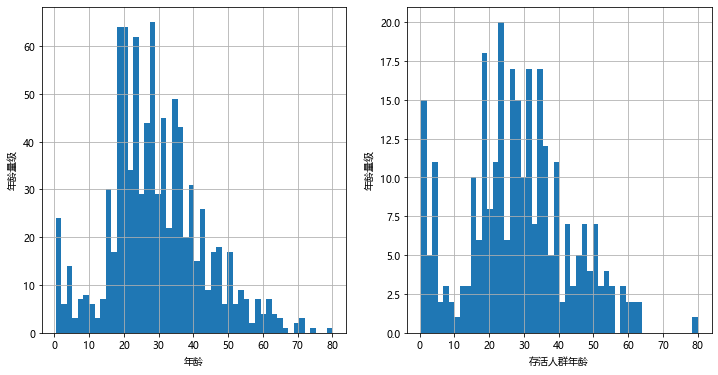

In [19]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']  = False
plt.figure(figsize = (12,6))
plt.subplot(121)
Titanic['Age'].hist(bins = 50)
plt.xlabel('年龄')
plt.ylabel('年龄量级')
plt.subplot(122)
Survived['Age'].hist(bins = 50)
plt.xlabel('存活人群年龄')
plt.ylabel('年龄量级')
 
plt.show()

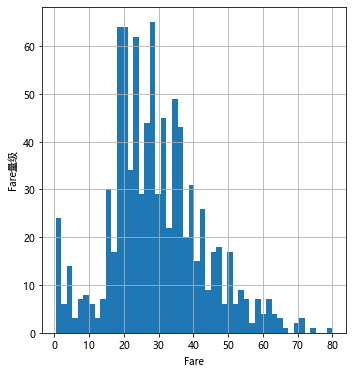

In [20]:
plt.figure(figsize=(12,6))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']  = False
plt.subplot(121)
Titanic['Age'].hist(bins = 50)
plt.xlabel('Fare')
plt.ylabel('Fare量级')
plt.show()

# 推断统计-使用Logistic模型做一个简单模型

In [21]:
from sklearn import linear_model

In [22]:
Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
Titanic.replace('male',1,inplace=True)
Titanic.replace('female',0,inplace=True)

In [24]:
Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [25]:
Titanic_new = Titanic.drop(columns=['SibSp','Parch','Embarked'],axis=1)

In [26]:
Titanic_new.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [27]:
predictors_logic = Titanic_new.columns[1:]

In [28]:
#构建自变量矩阵
X = Titanic_new.loc[:,predictors_logic]

In [29]:
y = Titanic_new.Survived

In [30]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.25,random_state=1234)

In [31]:
#利用训练集建模
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X_train,y_train)

LogisticRegression()

In [32]:
#返回模型的各个参数
print(sklearn_logistic.intercept_,sklearn_logistic.coef_)

[4.138486] [[-1.07907258e+00 -2.41452490e+00 -2.90724163e-02  2.25339671e-03]]


可以发现这个效果并不是很好，所以换一种方法来做

# 使用决策树建模

In [33]:
#将数值型的Pclass转换成类别行，否则无法对其哑变量处理
Titanic.Pclass = Titanic.Pclass.astype('category')

#亚变量处理
dummy = pd.get_dummies(Titanic[['Embarked','Pclass']])

#水平合并Titanic数据集和哑变量的数据集
Titanic = pd.concat([Titanic,dummy],axis=1)

#删除原始的Sex、Embarked和Pclass变量
Titanic.drop(['Embarked','Pclass'],inplace=True,axis=1)

Titanic.head(5)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [34]:
from sklearn import model_selection
#取出所有的自变量名
predictors = Titanic.columns[1:]

#拆分为训练集和测试集，训练集占75%，测试集占25%
X_train,X_test,y_train,y_test = model_selection.train_test_split(Titanic[predictors],Titanic.Survived,test_size = 0.25,random_state = 1234)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [36]:
#预设各参数的不同选项值
max_depth = [2,3,4,5,6]
min_samples_split = [2,4,6,8]
min_samples_leaf = [2,4,8,10,12]

#将各参数值以字典形式组织起来
parameters = {'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

#网格搜索法，测试不同的参数值
grid_dtcateg = GridSearchCV(estimator = tree.DecisionTreeClassifier(),param_grid = parameters,cv=10)

#模型拟合
grid_dtcateg.fit(X_train,y_train)

#返回最佳组合的参数值
grid_dtcateg.best_params_

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 6}

In [ ]:
from sklearn import metrics
#构建分类决策树
CART_Class = tree.DecisionTreeClassifier(max_depth = 6,min_samples_split =8, min_samples_leaf = 2)

#模型拟合
decision_tree = CART_Class.fit(X_train,y_train)

#模型在测试集上的预测
pred = CART_Class.predict(X_test)

#模型的准确率
print('模型在测试集的预测准确率:\n',metrics.accuracy_score(y_test,pred))
print('模型在训练集的预测准确率:\n',metrics.accuracy_score(y_train,CART_Class.predict(X_train)))

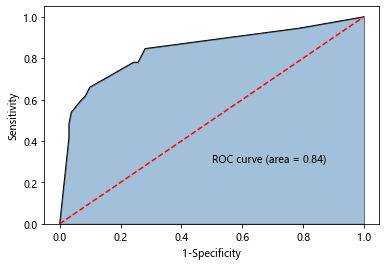

In [38]:
import matplotlib.pyplot as plt

y_score = CART_Class.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)

#计算AUC值
roc_auc = metrics.auc(fpr,tpr)
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')

#添加边际线和对角线
plt.plot(fpr,tpr,color = 'black',lw = 1)
plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

#添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)

#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

In [39]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from six import StringIO

In [40]:
#绘制决策树
dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,
    feature_names=predictors,
    class_names=['Unsurvived','Survived'],
    filled=True,
    rounded=True,
    special_characters=True
)

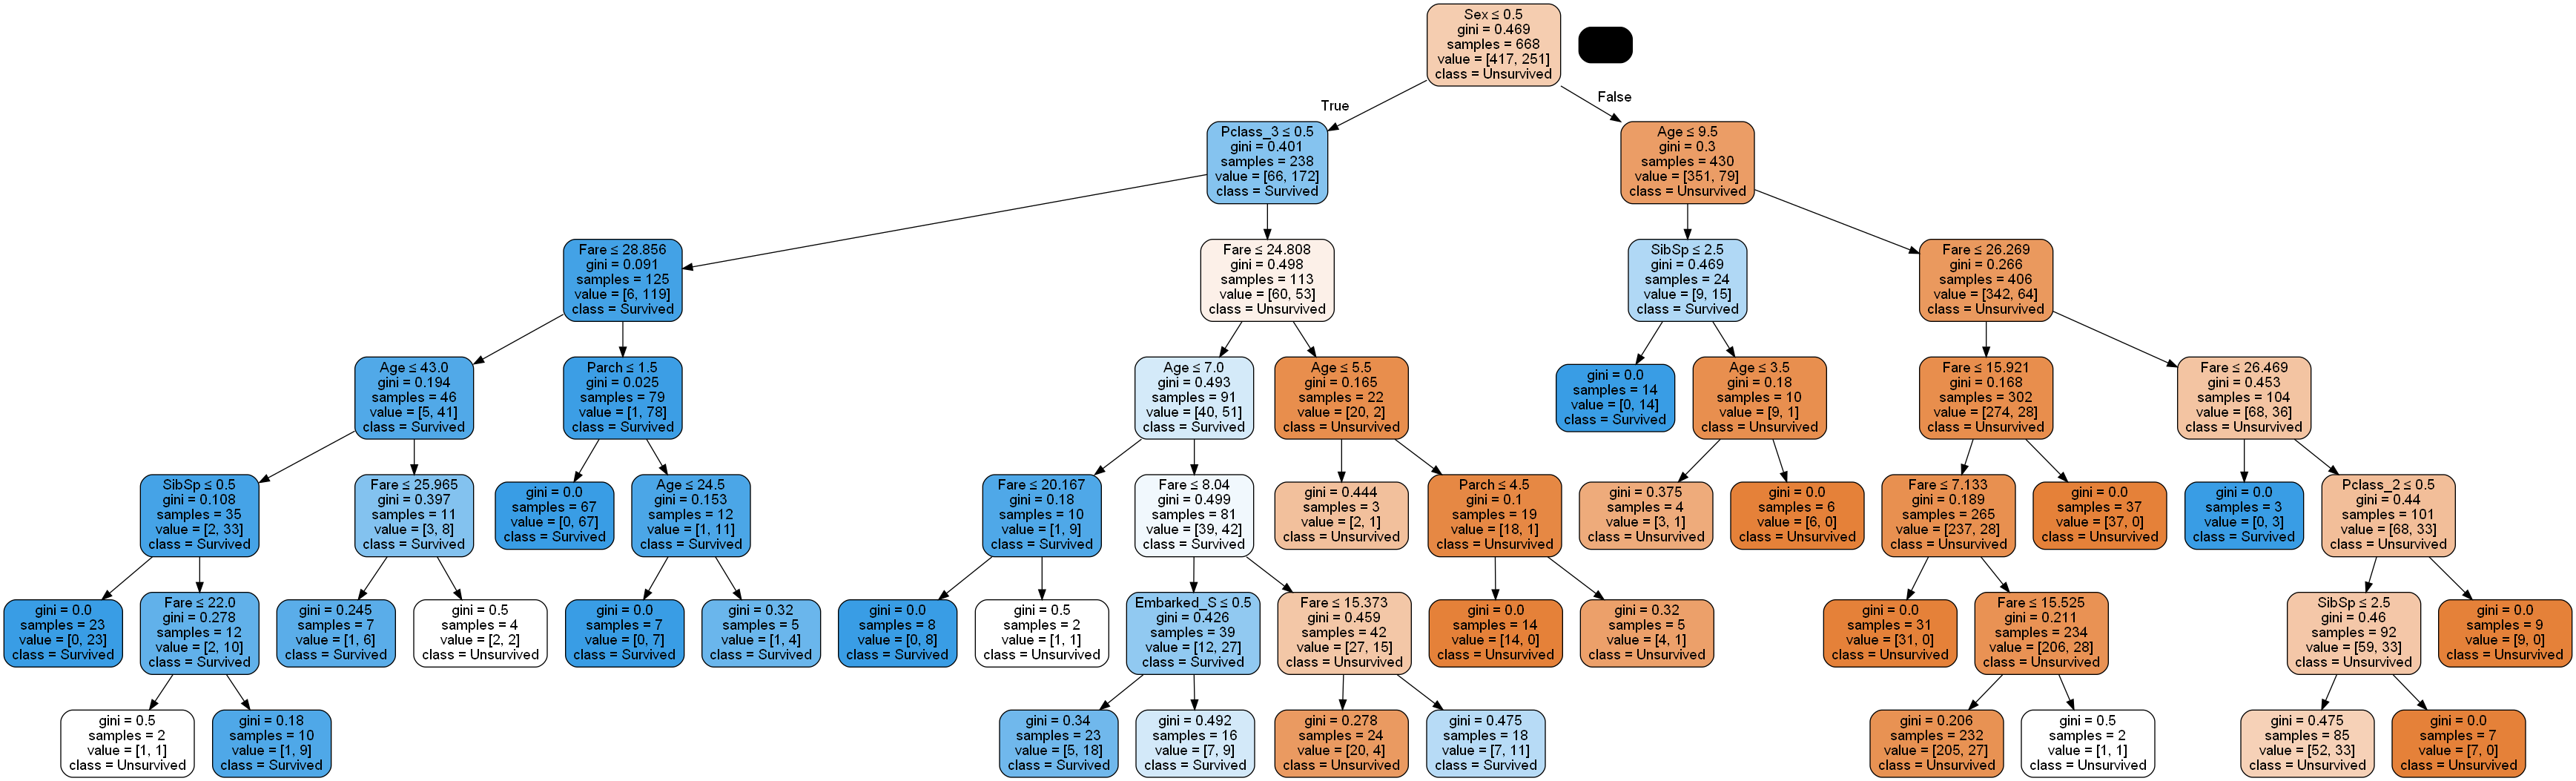

In [41]:
#决策树展现
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [42]:
from sklearn import ensemble

#构建随机森林
RF_class = ensemble.RandomForestClassifier(n_estimators=200,random_state = 1234)

#随机森林的拟合
RF_class.fit(X_train,y_train)

#模型在测试集上的预测
RFclass_pred = RF_class.predict(X_test)

#模型的准确率
print("模型在测试集的预测准确率：\n",metrics.accuracy_score(y_test,RFclass_pred))

模型在测试集的预测准确率：
 0.7937219730941704


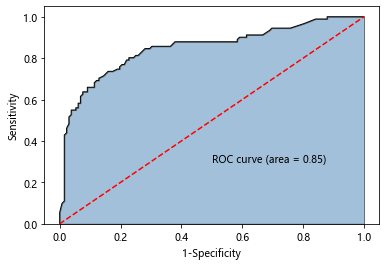

In [43]:
y_score = RF_class.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)

#计算AUC值
roc_auc = metrics.auc(fpr,tpr)
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')

#添加边际线和对角线
plt.plot(fpr,tpr,color = 'black',lw = 1)
plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

#添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)

#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

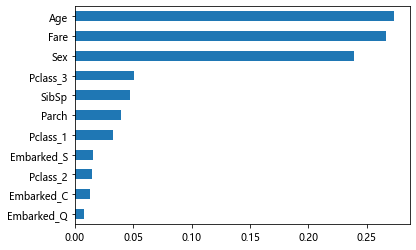

In [44]:
#变量的重要性程度值
importance = RF_class.feature_importances_

#构建含序列用于绘图
Impt_Series = pd.Series(importance,index = X_train.columns)

#对序列排序绘图
Impt_Series.sort_values(ascending = True).plot(kind = 'barh')
plt.show()